# Random Forest Classification

## Importing the libraries

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [91]:
dataset=pd.read_csv('TrainingData.csv')

In [92]:
dataset1=dataset.iloc[:,:18]

In [93]:
dataset.head()


,SigMean,SigMedian,SigRMS,SigVar,SigPeak,SigPeak2Peak,SigSkewness,SigKurtosis,SigCrestFactor,SigMAD,...,SigApproxEntropy,SigLyapExponent,PeakFreq,HighFreqPower,EnvPower,PeakSpecKurtosis,SensorDrift,ShaftWear,ToothFault,FaultCode
0,-0.948761,-0.972196,1.372583,0.983870,0.815715,3.631427,-0.041525,2.266640,2.051397,0.808100,...,0.031601,79.531203,0.0,6.752766e-06,3.234881e-07,162.128442,1,0,0,1
1,-0.975373,-0.989578,1.393691,0.991055,0.815710,3.631419,-0.023777,2.259799,2.020325,0.810168,...,0.037860,70.338970,0.0,5.078814e-08,9.156762e-08,226.121159,1,0,0,1
2,1.050229,1.026696,1.444941,0.984908,2.815713,3.631428,-0.041620,2.265831,1.948669,0.808529,...,0.031586,125.184204,0.0,6.741556e-06,3.134318e-07,162.125853,1,1,0,3
3,1.022692,1.004493,1.428776,0.995534,2.815709,3.631424,-0.016356,2.248299,1.970714,0.813243,...,0.032109,112.515510,0.0,4.993402e-06,2.578716e-07,162.127686,1,1,0,3
4,1.012303,1.002366,1.420230,0.992327,2.815716,3.631432,-0.014701,2.254229,1.982578,0.811556,...,0.032891,109.018789,0.0,3.618971e-06,2.239718e-07,230.391220,1,1,0,3


In [94]:
X=dataset.iloc[:,:-4].values
y1=dataset.iloc[:,-1].values

In [95]:
X

array([[-9.48761117e-01, -9.72196238e-01,  1.37258322e+00, ...,
         6.75276626e-06,  3.23488132e-07,  1.62128442e+02],
       [-9.75373294e-01, -9.89578040e-01,  1.39369104e+00, ...,
         5.07881430e-08,  9.15676154e-08,  2.26121159e+02],
       [ 1.05022864e+00,  1.02669556e+00,  1.44494144e+00, ...,
         6.74155614e-06,  3.13431810e-07,  1.62125853e+02],
       ...,
       [ 4.60071154e-02,  3.99563244e-02,  9.93327901e-01, ...,
         3.28291265e-07,  1.01068583e-07,  2.30391229e+02],
       [ 5.26899859e-02,  4.19380140e-02,  9.95427313e-01, ...,
         2.09212393e-07,  9.26843786e-08,  2.30386775e+02],
       [ 4.82495488e-02,  3.99641888e-02,  9.99285536e-01, ...,
         6.73868367e-07,  1.11404319e-07,  2.30386247e+02]])

In [99]:
y1

0      1
1      1
2      3
3      3
4      3
      ..
995    4
996    1
997    1
998    1
999    1
Name: FaultCode, Length: 1000, dtype: int64

In [101]:

# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
#X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
print(X.shape)
# define feature selection
list=[]
fs = SelectKBest(score_func=f_classif, k="all")
# apply feature selection
X_selected = fs.fit_transform(X, y1)
print(X_selected.shape)
print(fs.scores_)


(1000, 18)
(1000, 18)
[1.76496116e-01 1.16743261e-01 2.65279148e+00 2.47056761e+01
 8.48546224e-02 5.39228448e+01 3.83988674e+00 1.50700445e+01
 3.66860256e+01 1.82898377e+01 8.20686289e+00 2.94655950e+00
 8.00365013e+01 3.84954813e+00 1.02509035e+02 1.42780283e+01
 1.32315844e+01 2.42103725e+00]


In [102]:
d1=pd.DataFrame(fs.scores_,columns=['values'])

In [103]:
d1

,values
0,0.176496
1,0.116743
2,2.652791
3,24.705676
4,0.084855
5,53.922845
6,3.839887
7,15.070045
8,36.686026
9,18.289838


In [104]:
d2=pd.DataFrame(dataset1.columns,columns=['names'])

In [105]:
d2

,names
0,SigMean
1,SigMedian
2,SigRMS
3,SigVar
4,SigPeak
5,SigPeak2Peak
6,SigSkewness
7,SigKurtosis
8,SigCrestFactor
9,SigMAD


In [106]:
d=pd.concat([d2,d1],axis=1)

In [107]:
d

,names,values
0,SigMean,0.176496
1,SigMedian,0.116743
2,SigRMS,2.652791
3,SigVar,24.705676
4,SigPeak,0.084855
5,SigPeak2Peak,53.922845
6,SigSkewness,3.839887
7,SigKurtosis,15.070045
8,SigCrestFactor,36.686026
9,SigMAD,18.289838


In [108]:
sorted=d.sort_values(by=['values'],ascending=False)

In [109]:
sorted

,names,values
14,PeakFreq,102.509035
12,SigApproxEntropy,80.036501
5,SigPeak2Peak,53.922845
8,SigCrestFactor,36.686026
3,SigVar,24.705676
9,SigMAD,18.289838
7,SigKurtosis,15.070045
15,HighFreqPower,14.278028
16,EnvPower,13.231584
10,SigRangeCumSum,8.206863


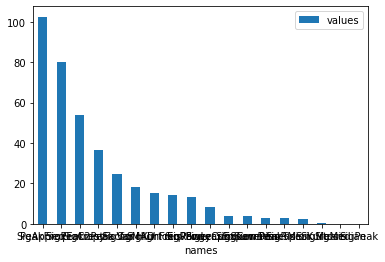

In [110]:
import matplotlib.pyplot as plt
ax = sorted.plot.bar(x='names', y='values', rot=0)

In [111]:
X=dataset.iloc[:,:-4]

In [112]:
X.head()

,SigMean,SigMedian,SigRMS,SigVar,SigPeak,SigPeak2Peak,SigSkewness,SigKurtosis,SigCrestFactor,SigMAD,SigRangeCumSum,SigCorrDimension,SigApproxEntropy,SigLyapExponent,PeakFreq,HighFreqPower,EnvPower,PeakSpecKurtosis
0,-0.948761,-0.972196,1.372583,0.983870,0.815715,3.631427,-0.041525,2.266640,2.051397,0.808100,28562.378552,1.142679,0.031601,79.531203,0.0,6.752766e-06,3.234881e-07,162.128442
1,-0.975373,-0.989578,1.393691,0.991055,0.815710,3.631419,-0.023777,2.259799,2.020325,0.810168,29418.371308,1.136217,0.037860,70.338970,0.0,5.078814e-08,9.156762e-08,226.121159
2,1.050229,1.026696,1.444941,0.984908,2.815713,3.631428,-0.041620,2.265831,1.948669,0.808529,31710.490113,1.147921,0.031586,125.184204,0.0,6.741556e-06,3.134318e-07,162.125853
3,1.022692,1.004493,1.428776,0.995534,2.815709,3.631424,-0.016356,2.248299,1.970714,0.813243,30983.969053,1.147176,0.032109,112.515510,0.0,4.993402e-06,2.578716e-07,162.127686
4,1.012303,1.002366,1.420230,0.992327,2.815716,3.631432,-0.014701,2.254229,1.982578,0.811556,30660.813951,1.146972,0.032891,109.018789,0.0,3.618971e-06,2.239718e-07,230.391220


# dropping columns based on scores

In [113]:
X=X.drop(['SigLyapExponent','SigSkewness','SigCorrDimension','SigRMS','PeakSpecKurtosis','SigMean','SigMedian','SigPeak'], axis = 1)

In [114]:
X=X.values

In [115]:
X

array([[9.83869723e-01, 3.63142726e+00, 2.26663989e+00, ...,
        0.00000000e+00, 6.75276626e-06, 3.23488132e-07],
       [9.91054543e-01, 3.63141919e+00, 2.25979921e+00, ...,
        0.00000000e+00, 5.07881430e-08, 9.15676154e-08],
       [9.84908259e-01, 3.63142817e+00, 2.26583066e+00, ...,
        0.00000000e+00, 6.74155614e-06, 3.13431810e-07],
       ...,
       [9.84616344e-01, 3.63142945e+00, 2.27184701e+00, ...,
        1.91801359e+00, 3.28291265e-07, 1.01068583e-07],
       [9.88132084e-01, 3.63143079e+00, 2.26554469e+00, ...,
        1.93310421e+00, 2.09212393e-07, 9.26843786e-08],
       [9.96276627e-01, 3.63143015e+00, 2.25210998e+00, ...,
        1.88633981e+00, 6.73868367e-07, 1.11404319e-07]])

# getting back acutall y value , intial y columns clubbed only for feature selction

In [116]:
y=dataset.iloc[:,-4:-1].values

In [117]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

## Splitting the dataset into the Training set and Test set (without feature selection)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=0)

In [119]:
print(X_train)

[[9.94374175e-01 3.63143024e+00 2.25608010e+00 ... 1.89054413e+00
  6.27266071e-07 9.65372394e-08]
 [9.93141649e-01 3.63142571e+00 2.25975920e+00 ... 1.99957850e+00
  5.04197433e-12 8.35298686e-08]
 [9.92170395e-01 3.63142429e+00 2.25685356e+00 ... 1.84777640e+00
  8.79794030e-07 1.29868212e-07]
 ...
 [9.96407740e-01 3.63142056e+00 2.25247782e+00 ... 1.99265727e+00
  2.38660487e-09 8.90874583e-08]
 [9.95211282e-01 3.63142854e+00 2.25647204e+00 ... 1.88225301e+00
  7.48728063e-07 1.03121710e-07]
 [9.88819917e-01 3.63142853e+00 2.26699945e+00 ... 1.95962462e+00
  7.55571086e-08 9.26014637e-08]]


In [120]:
print(y_train.shape)

(750, 3)


In [121]:
print(X_test)

[[9.95243637e-01 3.63143113e+00 2.25347975e+00 ... 1.94188594e+00
  1.60694871e-07 9.56662267e-08]
 [9.85595686e-01 3.63142577e+00 2.27122527e+00 ... 1.91370017e+00
  3.82137999e-07 8.97294849e-08]
 [9.96576059e-01 3.63142098e+00 2.25235441e+00 ... 1.99264104e+00
  2.65367225e-09 8.91500719e-08]
 ...
 [9.84908259e-01 3.63142817e+00 2.26583066e+00 ... 0.00000000e+00
  6.74155614e-06 3.13431810e-07]
 [9.87124627e-01 3.63142705e+00 2.26495130e+00 ... 1.86079113e+00
  7.16219683e-07 1.02866801e-07]
 [9.96407740e-01 3.63142056e+00 2.25247782e+00 ... 1.99265727e+00
  2.37970394e-09 8.90874583e-08]]


In [122]:
print(y_test)

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

## Feature Scaling

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
print(X_train)

[[ 0.50154567  0.75734567 -0.47727378 ... -0.01259254  0.05822148
  -0.25899164]
 [ 0.26411581 -0.68146452 -0.01698608 ...  0.11052591 -0.59255159
  -0.63036904]
 [ 0.07701664 -1.13425438 -0.38050732 ... -0.06088462  0.32021512
   0.69265109]
 ...
 [ 0.89328512 -2.31834144 -0.92795284 ...  0.10271066 -0.59008076
  -0.47169261]
 [ 0.66280324  0.21670474 -0.42823871 ... -0.02195464  0.18423631
  -0.07099642]
 [-0.56840857  0.21467442  0.8888355  ...  0.06541115 -0.51416756
  -0.37136317]]


In [125]:
print(X_test)

[[ 0.669036    1.04115367 -0.80260193 ...  0.04538113 -0.42583852
  -0.2838602 ]
 [-1.18951394 -0.66453058  1.41752395 ...  0.01355459 -0.19609489
  -0.45336191]
 [ 0.92570943 -2.18690244 -0.9433915  ...  0.10269232 -0.58980368
  -0.46990491]
 ...
 [-1.32193758  0.09828316  0.74260948 ... -2.1473401   6.40169759
   5.9336311 ]
 [-0.89498373 -0.25685847  0.63259264 ... -0.04618876  0.1505094
  -0.0782744 ]
 [ 0.89328512 -2.31834144 -0.92795284 ...  0.10271066 -0.59008792
  -0.47169261]]


## Training the Random Forest Classification model on the Training set

In [126]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [127]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),3), y_test.reshape(len(y_test),3)),1))

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 0 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

In [128]:
print(y_test)

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

## Making the Confusion Matrix

In [129]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[[ 25   0]
  [  0 225]]

 [[112  13]
  [  4 121]]

 [[205   0]
  [  0  45]]]


0.932

# checking by dropping less feaatures => selected 15 features ,,dropped the score below 1

In [133]:
X=dataset.iloc[:,:-4]

# dropping columns based on scores(dropped the scores below 1)

In [134]:
X=X.drop(['SigMean','SigMedian','SigPeak'], axis = 1)

In [135]:
X=X.values

In [136]:
X

array([[1.37258322e+00, 9.83869723e-01, 3.63142726e+00, ...,
        6.75276626e-06, 3.23488132e-07, 1.62128442e+02],
       [1.39369104e+00, 9.91054543e-01, 3.63141919e+00, ...,
        5.07881430e-08, 9.15676154e-08, 2.26121159e+02],
       [1.44494144e+00, 9.84908259e-01, 3.63142817e+00, ...,
        6.74155614e-06, 3.13431810e-07, 1.62125853e+02],
       ...,
       [9.93327901e-01, 9.84616344e-01, 3.63142945e+00, ...,
        3.28291265e-07, 1.01068583e-07, 2.30391229e+02],
       [9.95427313e-01, 9.88132084e-01, 3.63143079e+00, ...,
        2.09212393e-07, 9.26843786e-08, 2.30386775e+02],
       [9.99285536e-01, 9.96276627e-01, 3.63143015e+00, ...,
        6.73868367e-07, 1.11404319e-07, 2.30386247e+02]])

# getting back acutall y value , intial y columns clubbed only for feature selction

In [137]:
y=dataset.iloc[:,-4:-1].values

In [138]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

## Splitting the dataset into the Training set and Test set (without feature selection)

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=0)

In [140]:
print(X_train)

[[9.97741819e-01 9.94374175e-01 3.63143024e+00 ... 6.27266071e-07
  9.65372394e-08 2.30391987e+02]
 [1.01105276e+00 9.93141649e-01 3.63142571e+00 ... 5.04197433e-12
  8.35298686e-08 2.26121457e+02]
 [9.98837188e-01 9.92170395e-01 3.63142429e+00 ... 8.79794030e-07
  1.29868212e-07 2.30390858e+02]
 ...
 [9.98432475e-01 9.96407740e-01 3.63142056e+00 ... 2.38660487e-09
  8.90874583e-08 2.26126670e+02]
 [9.97663917e-01 9.95211282e-01 3.63142854e+00 ... 7.48728063e-07
  1.03121710e-07 2.30392634e+02]
 [9.95419453e-01 9.88819917e-01 3.63142853e+00 ... 7.55571086e-08
  9.26014637e-08 2.30389645e+02]]


In [141]:
print(y_train.shape)

(750, 3)


In [142]:
print(X_test)

[[9.97886623e-01 9.95243637e-01 3.63143113e+00 ... 1.60694871e-07
  9.56662267e-08 2.26123812e+02]
 [1.00307617e+00 9.85595686e-01 3.63142577e+00 ... 3.82137999e-07
  8.97294849e-08 2.30387073e+02]
 [9.99668137e-01 9.96576059e-01 3.63142098e+00 ... 2.65367225e-09
  8.91500719e-08 2.26124828e+02]
 ...
 [1.44494144e+00 9.84908259e-01 3.63142817e+00 ... 6.74155614e-06
  3.13431810e-07 1.62125853e+02]
 [9.93673908e-01 9.87124627e-01 3.63142705e+00 ... 7.16219683e-07
  1.02866801e-07 2.30389386e+02]
 [1.00946140e+00 9.96407740e-01 3.63142056e+00 ... 2.37970394e-09
  8.90874583e-08 2.26126670e+02]]


In [143]:
print(y_test)

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

## Feature Scaling

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [145]:
print(X_train)

[[-0.35728621  0.50154567  0.75734567 ...  0.05822148 -0.25899164
   0.33473909]
 [-0.20789474  0.26411581 -0.68146452 ... -0.59255159 -0.63036904
   0.11496339]
 [-0.34499266  0.07701664 -1.13425438 ...  0.32021512  0.69265109
   0.33468098]
 ...
 [-0.34953483  0.89328512 -2.31834144 ... -0.59008076 -0.47169261
   0.1152317 ]
 [-0.35816052  0.66280324  0.21670474 ...  0.18423631 -0.07099642
   0.33477238]
 [-0.38335061 -0.56840857  0.21467442 ... -0.51416756 -0.37136317
   0.33461856]]


In [146]:
print(X_test)

[[-0.35566104  0.669036    1.04115367 ... -0.42583852 -0.2838602
   0.11508458]
 [-0.29741764 -1.18951394 -0.66453058 ... -0.19609489 -0.45336191
   0.33448617]
 [-0.33566674  0.92570943 -2.18690244 ... -0.58980368 -0.46990491
   0.11513688]
 ...
 [ 4.66172949 -1.32193758  0.09828316 ...  6.40169759  5.9336311
  -3.17846294]
 [-0.40294123 -0.89498373 -0.25685847 ...  0.1505094  -0.0782744
   0.3346052 ]
 [-0.22575492  0.89328512 -2.31834144 ... -0.59008792 -0.47169261
   0.1152317 ]]


## Training the Random Forest Classification model on the Training set

In [147]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [148]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),3), y_test.reshape(len(y_test),3)),1))

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 0 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

In [149]:
print(y_test)

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

## Making the Confusion Matrix

In [150]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[[ 25   0]
  [  0 225]]

 [[118   7]
  [  4 121]]

 [[205   0]
  [  0  45]]]


0.956

## Training the Decision tree Classification model on the Training set

In [163]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [164]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),3), y_test.reshape(len(y_test),3)),1))

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 1 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 0 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 0 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

In [165]:
print(y_test)

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

## Making the Confusion Matrix

In [154]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[[ 25   0]
  [  0 225]]

 [[116   9]
  [  3 122]]

 [[205   0]
  [  0  45]]]


0.952

## Training the K-NN Classification model on the Training set

In [159]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [160]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),3), y_test.reshape(len(y_test),3)),1))

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 1 0]
 [0 1 1]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 0]
 [1 1 0]
 [0 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 1]
 

In [161]:
print(y_test)

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

## Making the Confusion Matrix

In [162]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[[  3  22]
  [  0 225]]

 [[ 93  32]
  [  8 117]]

 [[204   1]
  [  0  45]]]


0.768

## Training the svm Classification model on the Training set

In [167]:
y = dataset.iloc[:, -1].values

In [168]:
y

array([1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 7, 4, 0, 0, 0, 0, 0, 4, 5,
       1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 5,
       5, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1,
       5, 1, 6, 2, 2, 2, 2, 2, 6, 7, 3, 3, 1, 3, 3, 3, 7, 7, 3, 3, 3, 3,
       3, 1, 7, 7, 3, 3, 3, 3, 3, 7, 7, 3, 1, 3, 3, 3, 3, 7, 7, 3, 3, 3,
       3, 1, 1, 3, 7, 7, 3, 3, 3, 3, 3, 7, 1, 5, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 5, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 7, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 6, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 4, 0, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5,
       0, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 4, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1,
       5, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 6, 2, 2, 2, 2,
       1, 2, 2, 6, 2, 2, 2, 6, 7, 3, 3, 1, 3, 3, 3, 3, 7, 3, 3, 3, 7, 7,
       1, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 1, 7, 7, 3,

## Splitting the dataset into the Training set and Test set (without feature selection)

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=0)

In [170]:
print(X_train)

[[9.97741819e-01 9.94374175e-01 3.63143024e+00 ... 6.27266071e-07
  9.65372394e-08 2.30391987e+02]
 [1.01105276e+00 9.93141649e-01 3.63142571e+00 ... 5.04197433e-12
  8.35298686e-08 2.26121457e+02]
 [9.98837188e-01 9.92170395e-01 3.63142429e+00 ... 8.79794030e-07
  1.29868212e-07 2.30390858e+02]
 ...
 [9.98432475e-01 9.96407740e-01 3.63142056e+00 ... 2.38660487e-09
  8.90874583e-08 2.26126670e+02]
 [9.97663917e-01 9.95211282e-01 3.63142854e+00 ... 7.48728063e-07
  1.03121710e-07 2.30392634e+02]
 [9.95419453e-01 9.88819917e-01 3.63142853e+00 ... 7.55571086e-08
  9.26014637e-08 2.30389645e+02]]


In [171]:
print(y_train.shape)

(750,)


In [172]:
print(X_test)

[[9.97886623e-01 9.95243637e-01 3.63143113e+00 ... 1.60694871e-07
  9.56662267e-08 2.26123812e+02]
 [1.00307617e+00 9.85595686e-01 3.63142577e+00 ... 3.82137999e-07
  8.97294849e-08 2.30387073e+02]
 [9.99668137e-01 9.96576059e-01 3.63142098e+00 ... 2.65367225e-09
  8.91500719e-08 2.26124828e+02]
 ...
 [1.44494144e+00 9.84908259e-01 3.63142817e+00 ... 6.74155614e-06
  3.13431810e-07 1.62125853e+02]
 [9.93673908e-01 9.87124627e-01 3.63142705e+00 ... 7.16219683e-07
  1.02866801e-07 2.30389386e+02]
 [1.00946140e+00 9.96407740e-01 3.63142056e+00 ... 2.37970394e-09
  8.90874583e-08 2.26126670e+02]]


In [173]:
print(y_test)

[3 3 7 2 3 3 1 4 7 1 4 2 4 1 3 1 3 1 4 3 1 1 3 7 3 1 1 3 1 1 1 1 7 1 1 1 7
 7 1 6 1 1 3 3 1 5 1 1 3 7 1 3 2 1 1 3 7 2 3 0 3 7 1 3 7 3 1 1 1 7 1 7 0 1
 3 3 3 0 3 7 2 1 1 3 3 7 1 1 0 3 0 1 3 3 3 0 3 3 3 3 0 1 1 7 3 3 3 1 3 5 7
 3 5 5 1 3 1 3 1 1 1 7 1 3 5 2 3 3 3 1 1 1 1 1 1 3 7 3 1 3 3 3 1 1 3 1 3 3
 1 1 6 1 3 5 3 3 1 3 3 1 3 3 3 7 3 7 5 7 7 1 3 5 1 1 5 0 5 3 3 1 1 1 5 3 3
 3 5 1 0 3 1 1 5 3 1 3 1 1 3 1 3 1 3 3 1 3 1 1 1 1 3 3 5 3 0 3 1 1 1 1 1 3
 3 2 3 3 3 1 0 1 1 1 3 1 1 3 7 2 1 3 1 1 3 5 3 1 3 3 1 7]


## Feature Scaling

In [190]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [191]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the Test set results

In [192]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[3 3 7 2 3 3 1 5 7 1 4 2 4 3 3 5 3 3 4 3 3 3 1 7 3 3 1 1 1 7 3 3 7 3 1 3 7
 7 3 7 3 3 3 3 1 5 3 1 3 7 3 5 2 3 3 3 7 0 3 2 3 7 3 1 7 1 3 3 3 7 3 7 2 3
 3 1 5 2 3 7 2 3 3 3 3 7 1 3 2 3 2 3 3 1 3 2 3 3 3 3 2 3 1 7 3 3 3 1 3 5 7
 3 5 5 3 1 3 3 3 1 3 7 7 3 5 2 1 1 3 3 3 3 3 3 3 3 7 3 3 3 3 3 3 1 3 3 3 3
 3 3 7 3 1 5 3 3 1 5 3 1 3 3 3 7 3 7 5 7 7 3 3 5 3 3 5 2 5 3 3 3 3 3 5 3 3
 3 5 3 2 3 3 3 5 3 1 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 5 3 2 3 3 1 5 1 3 3
 3 0 3 3 3 1 2 3 3 3 3 3 3 3 7 2 3 3 1 3 3 5 3 3 3 1 3 7]
[[3 3]
 [3 3]
 [7 7]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [5 4]
 [7 7]
 [1 1]
 [4 4]
 [2 2]
 [4 4]
 [3 1]
 [3 3]
 [5 1]
 [3 3]
 [3 1]
 [4 4]
 [3 3]
 [3 1]
 [3 1]
 [1 3]
 [7 7]
 [3 3]
 [3 1]
 [1 1]
 [1 3]
 [1 1]
 [7 1]
 [3 1]
 [3 1]
 [7 7]
 [3 1]
 [1 1]
 [3 1]
 [7 7]
 [7 7]
 [3 1]
 [7 6]
 [3 1]
 [3 1]
 [3 3]
 [3 3]
 [1 1]
 [5 5]
 [3 1]
 [1 1]
 [3 3]
 [7 7]
 [3 1]
 [5 3]
 [2 2]
 [3 1]
 [3 1]
 [3 3]
 [7 7]
 [0 2]
 [3 3]
 [2 0]
 [3 3]
 [7 7]
 [3 1]
 [1 3]
 [7 7]
 [1 3]
 [3 1]
 [3 1]
 [3 1]
 [7 7]
 [

In [193]:
print(y_test)

[3 3 7 2 3 3 1 4 7 1 4 2 4 1 3 1 3 1 4 3 1 1 3 7 3 1 1 3 1 1 1 1 7 1 1 1 7
 7 1 6 1 1 3 3 1 5 1 1 3 7 1 3 2 1 1 3 7 2 3 0 3 7 1 3 7 3 1 1 1 7 1 7 0 1
 3 3 3 0 3 7 2 1 1 3 3 7 1 1 0 3 0 1 3 3 3 0 3 3 3 3 0 1 1 7 3 3 3 1 3 5 7
 3 5 5 1 3 1 3 1 1 1 7 1 3 5 2 3 3 3 1 1 1 1 1 1 3 7 3 1 3 3 3 1 1 3 1 3 3
 1 1 6 1 3 5 3 3 1 3 3 1 3 3 3 7 3 7 5 7 7 1 3 5 1 1 5 0 5 3 3 1 1 1 5 3 3
 3 5 1 0 3 1 1 5 3 1 3 1 1 3 1 3 1 3 3 1 3 1 1 1 1 3 3 5 3 0 3 1 1 1 1 1 3
 3 2 3 3 3 1 0 1 1 1 3 1 1 3 7 2 1 3 1 1 3 5 3 1 3 3 1 7]


## Making the Confusion Matrix

In [194]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
cm = multilabel_confusion_matrix(y_test, y_pred)
print(y_test.shape)
print(cm)
accuracy_score(y_test, y_pred)

(250,)
[[[237   2]
  [ 11   0]]

 [[144  11]
  [ 74  21]]

 [[231  11]
  [  2   6]]

 [[ 89  70]
  [ 14  77]]

 [[246   0]
  [  1   3]]

 [[229   6]
  [  0  15]]

 [[248   0]
  [  2   0]]

 [[222   4]
  [  0  24]]]


0.584

## wíthout dropping any features

## Splitting the dataset into the Training set and Test set (without feature selection)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=0)

In [77]:
print(X_train)

[[ 3.38755210e-02  2.62811807e-02  9.97741819e-01 ...  6.27266071e-07
   9.65372394e-08  2.30391987e+02]
 [ 1.70642876e-01  1.51362656e-01  1.01105276e+00 ...  5.04197433e-12
   8.35298686e-08  2.26121457e+02]
 [ 7.44195377e-02  5.92319211e-02  9.98837188e-01 ...  8.79794030e-07
   1.29868212e-07  2.30390858e+02]
 ...
 [-2.21970011e-02 -4.05724052e-02  9.98432475e-01 ...  2.38660487e-09
   8.90874583e-08  2.26126670e+02]
 [ 1.24509466e-02  1.38765146e-03  9.97663917e-01 ...  7.48728063e-07
   1.03121710e-07  2.30392634e+02]
 [-4.55279610e-02 -5.75501009e-02  9.95419453e-01 ...  7.55571086e-08
   9.26014637e-08  2.30389645e+02]]


In [78]:
print(y_train.shape)

(750, 3)


In [79]:
print(X_test)

[[-2.38128955e-02 -3.89980112e-02  9.97886623e-01 ...  1.60694871e-07
   9.56662267e-08  2.26123812e+02]
 [-1.43522899e-01 -1.51432736e-01  1.00307617e+00 ...  3.82137999e-07
   8.97294849e-08  2.30387073e+02]
 [ 5.28524038e-02  3.40568307e-02  9.99668137e-01 ...  2.65367225e-09
   8.91500719e-08  2.26124828e+02]
 ...
 [ 1.05022864e+00  1.02669556e+00  1.44494144e+00 ...  6.74155614e-06
   3.13431810e-07  1.62125853e+02]
 [-1.72045480e-02 -3.52955795e-02  9.93673908e-01 ...  7.16219683e-07
   1.02866801e-07  2.30389386e+02]
 [ 1.50458004e-01  1.32082600e-01  1.00946140e+00 ...  2.37970394e-09
   8.90874583e-08  2.26126670e+02]]


In [80]:
print(y_test)

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

## Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
print(X_train)

[[ 0.01549377  0.0393742  -0.35728621 ...  0.05822148 -0.25899164
   0.33473909]
 [ 0.51373175  0.49527697 -0.20789474 ... -0.59255159 -0.63036904
   0.11496339]
 [ 0.163194    0.15947459 -0.34499266 ...  0.32021512  0.69265109
   0.33468098]
 ...
 [-0.18877617 -0.20429685 -0.34953483 ... -0.59008076 -0.47169261
   0.1152317 ]
 [-0.06255509 -0.05135889 -0.35816052 ...  0.18423631 -0.07099642
   0.33477238]
 [-0.27376992 -0.26617794 -0.38335061 ... -0.51416756 -0.37136317
   0.33461856]]


In [83]:
print(X_test)

[[-0.19466281 -0.19855842 -0.35566104 ... -0.42583852 -0.2838602
   0.11508458]
 [-0.63076153 -0.60836572 -0.29741764 ... -0.19609489 -0.45336191
   0.33448617]
 [ 0.08462579  0.06771525 -0.33566674 ... -0.58980368 -0.46990491
   0.11513688]
 ...
 [ 3.7180273   3.68573095  4.66172949 ...  6.40169759  5.9336311
  -3.17846294]
 [-0.17058886 -0.18506363 -0.40294123 ...  0.1505094  -0.0782744
   0.3346052 ]
 [ 0.44019907  0.42500413 -0.22575492 ... -0.59008792 -0.47169261
   0.1152317 ]]


## Training the Random Forest Classification model on the Training set

In [84]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the Test set results

In [85]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),3), y_test.reshape(len(y_test),3)),1))

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 0 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

In [86]:
print(y_test)

[[1 1 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 0 0]
 [0 1 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]
 [1 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 0 0]
 [1 1 1]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 0]
 [1 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]
 

## Making the Confusion Matrix

In [87]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[[ 25   0]
  [  0 225]]

 [[113  12]
  [  4 121]]

 [[205   0]
  [  0  45]]]


0.936

# Splitting the dataset into the Training set and Test set (with feature selection)